In [1]:
import pandas as pd
import ast
import warnings
import numpy as np
import h5py 
import glob
import matplotlib.pyplot as plt
import sys

### loading simulations

In [2]:
path_dict = {}

directory='/project/fudenber_735/polychrom/Dynamic_boundary_model/1d_sims_dynamic_boundary/dynamical_boundary_simulations/sims/'

for fname  in glob.glob(directory+'folder*'):
    path_dict[fname.split('sims/')[1][:]]= fname
path_dict = dict(sorted(path_dict.items()))

In [3]:
ctcfrightlist = [314, 579, 1195, 3717, 3772, 3921, 4451, 5193, 5723, 6302, 6574, 6779, 7000, 9232, 9310, 9861]
ctcfleftlist = [495, 865, 1404, 2164, 3143, 3615, 3971, 4069, 4480, 4938, 5300, 5587, 6401, 7725, 8764, 9619]
lst = np.array(ctcfrightlist + ctcfleftlist)


In [4]:
### list of boundary elements on all replications
rep = 10 
mon = 1000
site = 10
lst_t = []
for i in range(rep):
    lst_t += list(np.array(lst)+i*mon*site)

    

### functions for calculating Frip

In [5]:
def peak_positions(boundary_list, window_sizes=[1]):
    """
    Calculate peak positions based on a boundary_list within window_sizes.

    Args:
        boundary_list (list): List of boundary values.
        window_sizes (list, optional): List of window sizes. Defaults to [1].

    Returns:
        np.ndarray: Array containing peak positions.
    """
    peak_monomers = np.array([])

    for i in window_sizes:
        inds_to_add = [boundary + i for boundary in boundary_list]
        peak_monomers = np.hstack((peak_monomers, inds_to_add))

    return peak_monomers.astype(int)

def FRiP(num_sites_t, lef_positions, peak_positions ):
    
    hist,edges = np.histogram(  lef_positions  , np.arange(num_sites_t+1) )
    return np.sum(hist[peak_positions] )/len(lef_positions)

### visualizing some of chipseq maps

folder_face_1.0_back_0_Clife_3.0_Cof_0.3_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1
1000000


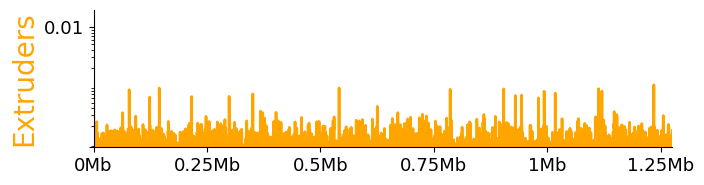

folder_face_1.0_back_0_Clife_500.0_Cof_50.0_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1
1000000


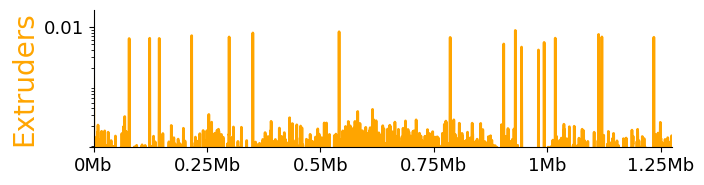

folder_face_1.0_back_0_Clife_1500.0_Cof_150.0_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1
1000000


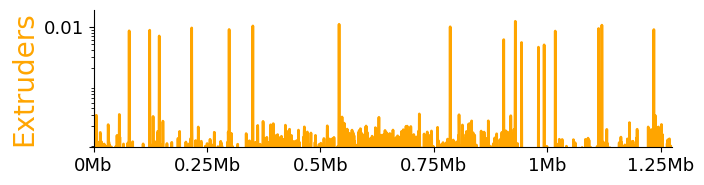

In [6]:
window_size = 1
numx,numy = 1,len(path_dict)
min_time = -500000
c=0
hist_dict = {}
#lst = np.arange(0,10001,500)
from matplotlib.ticker import ScalarFormatter
invs_dict = ['folder_face_1.0_back_0_Clife_3.0_Cof_0.3_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1',
             'folder_face_1.0_back_0_Clife_500.0_Cof_50.0_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1',
            'folder_face_1.0_back_0_Clife_1500.0_Cof_150.0_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1',
            #'folder_face_1.0_back_0_Clife_30.0_Cof_0.3_life_1500.0_slife_1500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_3'
            ]

for name in invs_dict:
    print(name)
    params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
    face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params

    c+=1
    #plt.subplot(numy,numx, c)

    mapN=mon*site
    lefs = h5py.File(path_dict[name]+'/LEFPositions.h5','r')["positions"]
    print(len(lefs))
    
    
    lef_lefts = lefs[min_time:,:,0].flatten()
    lef_rights = lefs[min_time:,:,1].flatten()
    lef_positions = np.hstack((lef_lefts,lef_rights))

    peak_monomers = peak_positions(lst_t,window_sizes=np.arange(-window_size,(window_size)+1) )
    frip = FRiP(mapN * rep, lef_positions, peak_monomers)
    #print(frip)


    plt.figure(figsize = (7.15,1.95))
    a,b = np.histogram(  np.mod( np.hstack((lef_lefts,lef_rights)) , mapN ), np.arange(0,mapN,1))
    plt.plot(a[:]/np.sum(a), label=name,color='orange',linewidth=1.95)
    
    #plt.grid(True)
    hist_dict[name] = a/np.sum(a)
    plt.yscale('log')
    plt.ylim([0.000085,.0195])
    plt.xlim(100,5100)
    # Hide frame on the right and top axes
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    plt.xticks(fontsize=12.975)
    plt.yticks(fontsize = 12.975)
    plt.xticks([0,1000,2000,3000,4000,5000])
    plt.yticks([0.000085,.01])
    plt.gca().set_xticklabels(['0Mb', '0.25Mb', '0.5Mb','0.75Mb','1Mb', '1.25Mb'])
    plt.gca().set_yticklabels(['','0.01'])
    plt.ylabel('Extruders',color='orange',fontsize=19.985)
    plt.tight_layout()
    plt.savefig('../../images/extchipseq_for_%s.pdf'%clife,transparent=True)
    plt.show()


### calculating and writing FRiPs 

In [ ]:
window_size = 1

file = open('../data/fripscore.csv', 'w')
file.write('lifetime, velocity, clife, cof,sep, fripscore\n')
i = 1
for name in list(path_dict.keys())[:]:
    params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
    face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params
    
    i += 1
    mapN=mon*site
    lefs = h5py.File(path_dict[name]+'/LEFPositions.h5','r')["positions"]

    lef_lefts = lefs[min_time:,:,0].flatten()
    lef_rights = lefs[min_time:,:,1].flatten()
    lef_positions = np.hstack((lef_lefts,lef_rights))


    peak_monomers = peak_positions(lst_t,window_sizes=np.arange(-window_size,(window_size)+1) )
    frip = FRiP(mapN * rep, lef_positions, peak_monomers)

    score = FRiP(mapN * rep, lef_positions, peak_monomers)
    file.write('%s,%s,%s,%s,%s,%s\n'%(life, vel, clife, cof, sep, score))
file.close()